# AUTORES

- ## Vago, Matias

- ## Vega, Sharim

- ## Grandinetti, Juan

- ## Scoflich, Lautaro

In [1]:
# Procesamiento y estructura de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

# Eliminar warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def Vertical(x):
  pprint(list(x))

# DATOS

## Carga

In [3]:
df = pd.read_csv("BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Nuestro objetivo es intentar clasificar a los clientes como existentes o desertores de la entidad bancaria, a partir de las features dadas.

## Pre-Análisis

In [4]:
# Cantidad de muestras
len(df)

10127

In [5]:
# Features
pprint(len(df.columns))
Vertical(df.columns)

23
['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']


In [6]:
df = df.drop( ["CLIENTNUM",
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
 axis=1)

In [7]:
Inc_dict = {'Less than $40K':'<40K' , '$40K - $60K':'40K - 60K', '$60K - $80K':'60K - 80K', '$80K - $120K':'80K - 120K', '$120K +': '>120K'}
df["Income_Category"] = df["Income_Category"].replace(Inc_dict)

df["Income_Category"].unique()

array(['60K - 80K', '<40K', '80K - 120K', '40K - 60K', '>120K', 'Unknown'],
      dtype=object)

In [8]:
# Features
pprint(len(df.columns))
Vertical(df.columns)

20
['Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']


In [9]:
categoricas = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',]

numericas =['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
            ]

## Análisis exploratorio de datos

In [10]:
df[numericas].describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


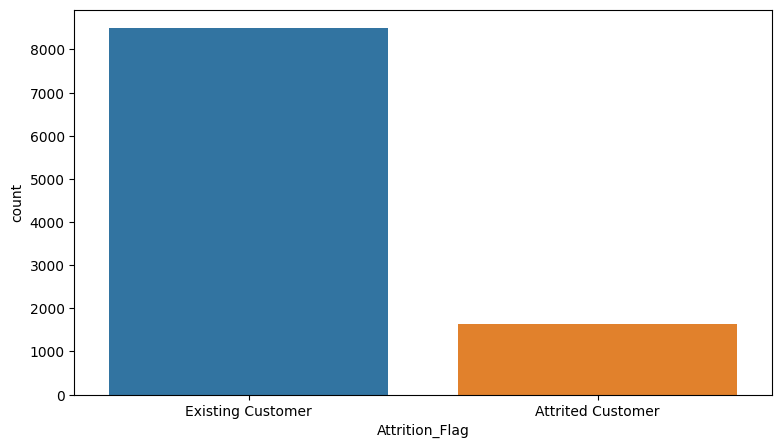

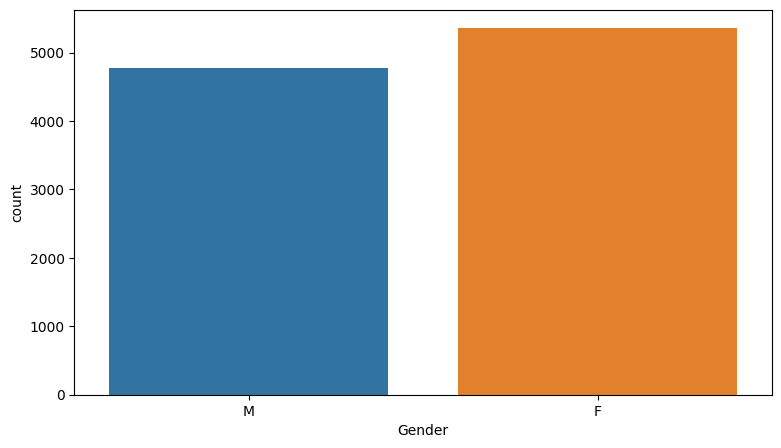

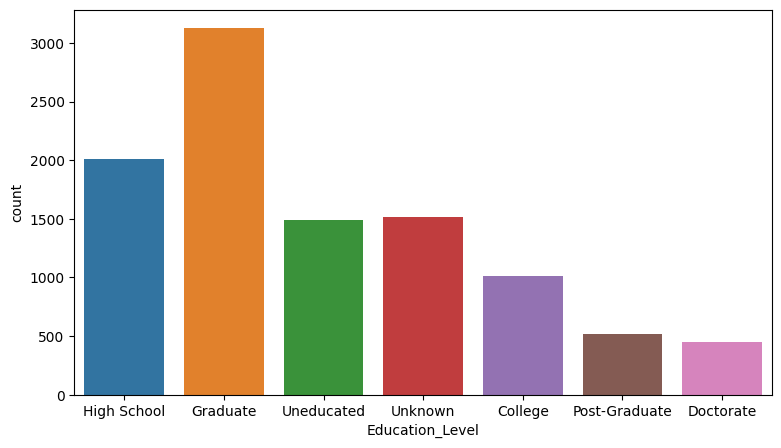

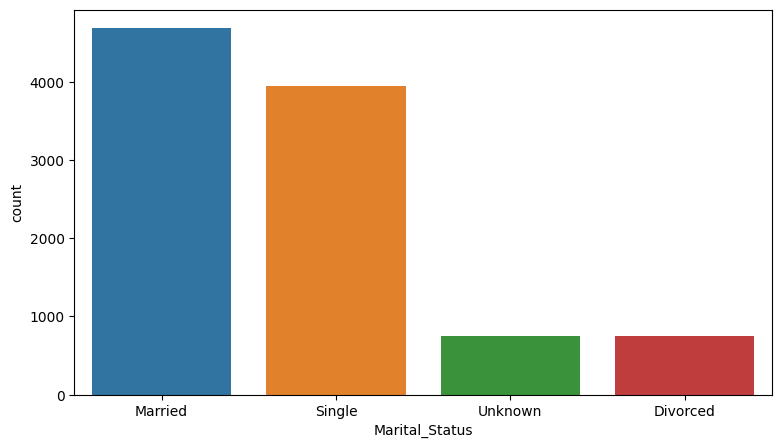

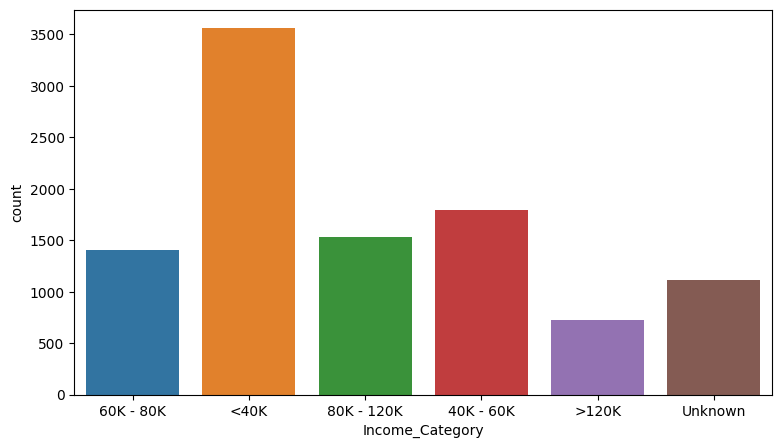

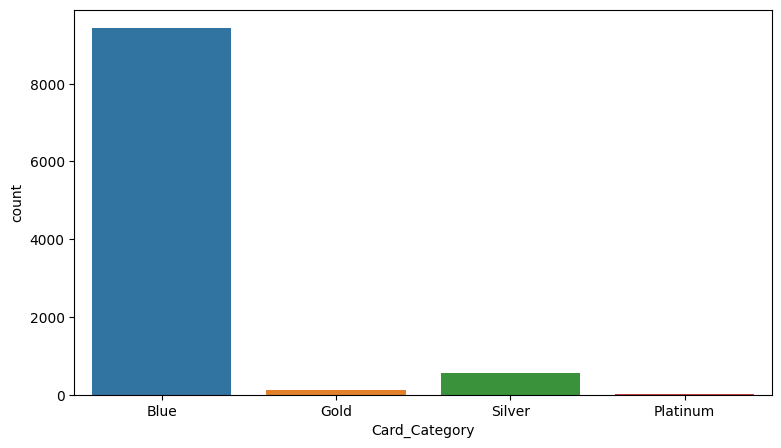

In [11]:
for i, col in enumerate(df[categoricas]):
    plt.figure(i, figsize=(9,5), dpi=100)
    sns.countplot(x=col, data=df[categoricas])

<AxesSubplot: xlabel='Income_Category', ylabel='count'>

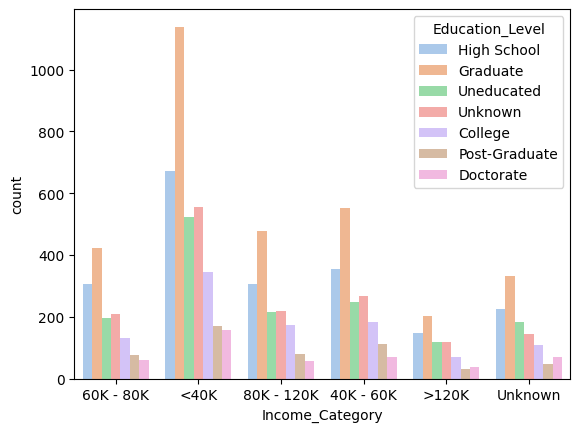

In [12]:
_ = sns.countplot(x='Income_Category', hue='Education_Level', palette='pastel', data=df)

Gracias a estas visualizaciones, podemos extraer algunas conclusiones:

GENDER
- Podemos tratar a los clientes cuya situación matrimonial es desconocida como solteros.

ATRITTION_FLAG
- Estamos frente a un problema desbalanceado, donde el estandard es que un cliente se quede en el banco. Debemos tenerlo en cuenta al momento de entrenar y evaluar al modelo, ya que no queremos que este simplemente se dedique a predecir a todos los clientes como "No Desertores".

### Tratamiento de datos desconocidos

In [13]:
len(df)

10127

In [14]:
# Situación sentimental desconocida -> Solteros

df["Marital_Status"] = df["Marital_Status"].replace( {"Unknown":"Single"})

In [15]:
# Nivel educativo desconocido -> Eliminamos el registro

df["Education_Level"] = df["Education_Level"].replace( {"Unknown":pd.NA})

In [16]:
# Categoría de ingresos desconocida -> Eliminamos el registro

df["Income_Category"] = df["Income_Category"].replace( {"Unknown":pd.NA})

In [17]:
df.dropna(inplace=True)

In [18]:
len(df)

7641

C:\Users\Lautaro\AppData\Local\Temp\ipykernel_6716\1675373384.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


Text(0.5, 1.0, 'Matriz de correlación')

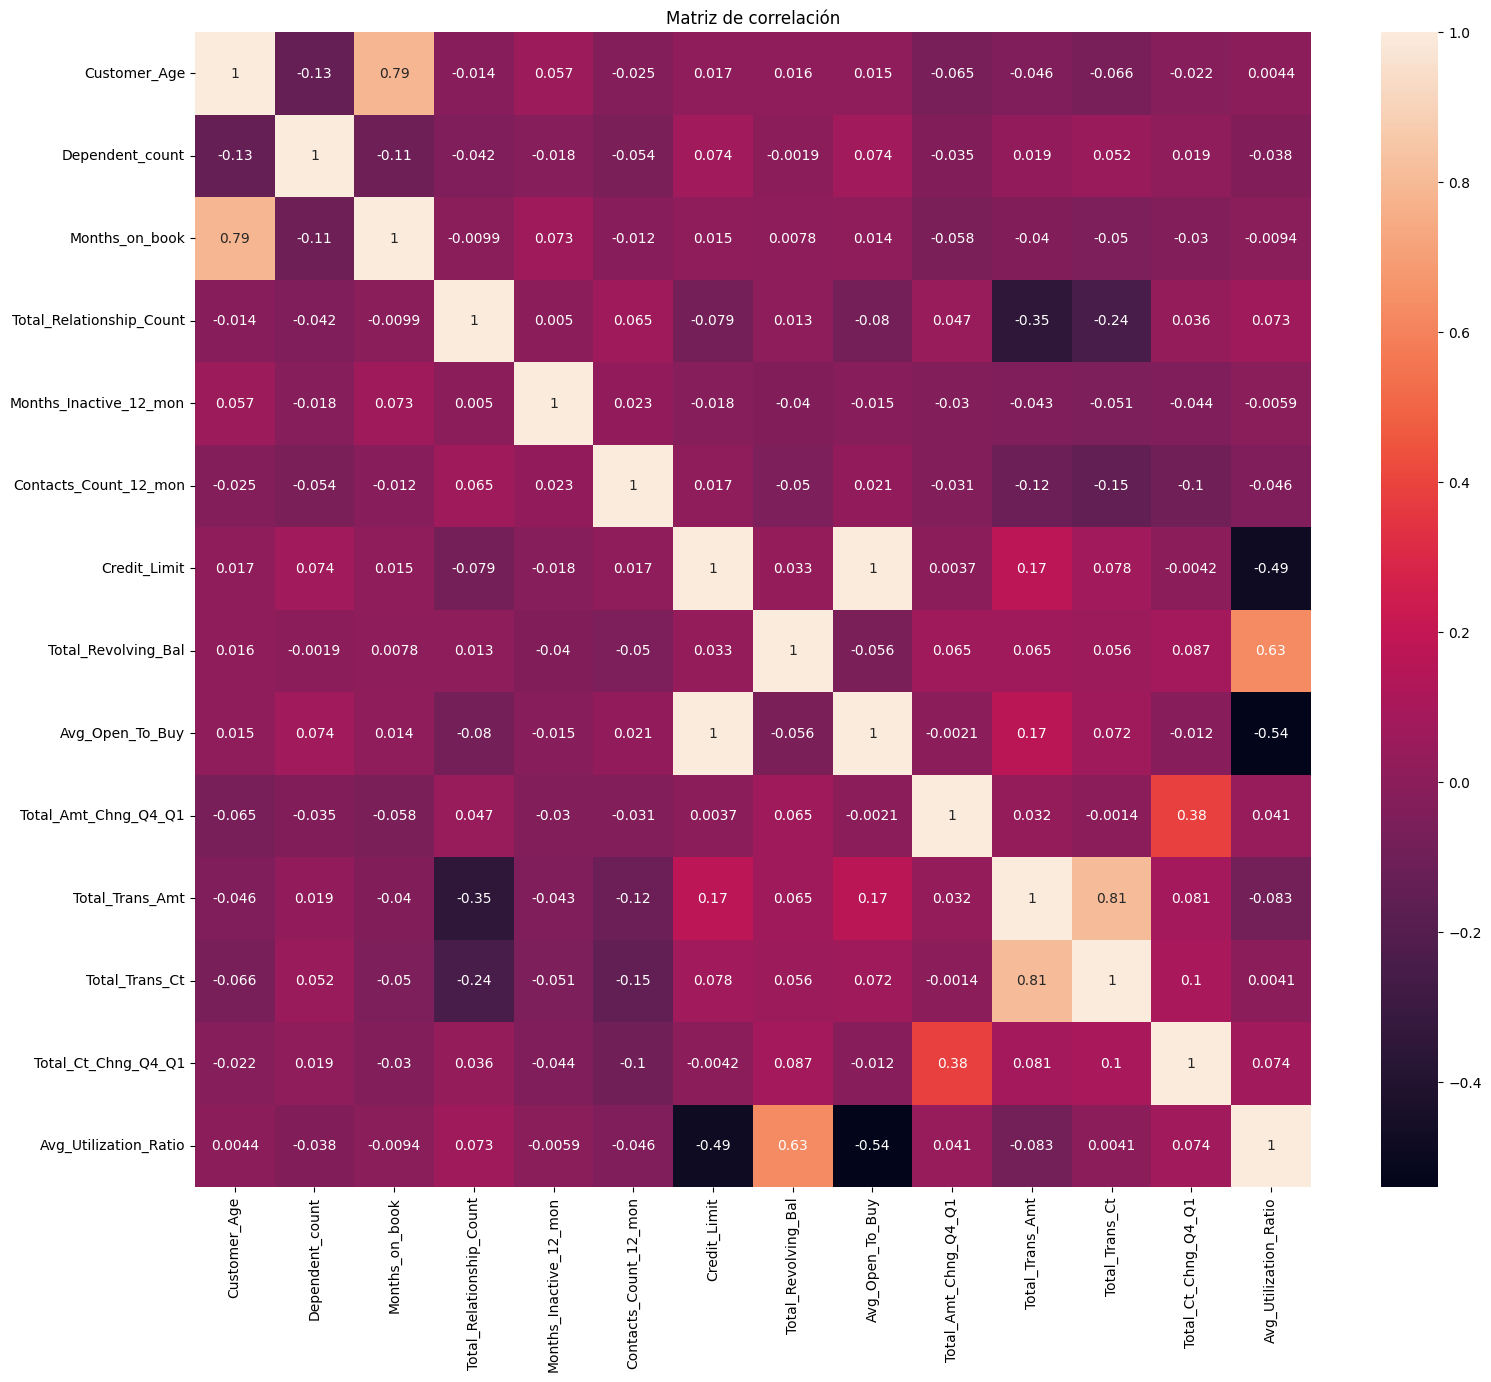

In [20]:
_ = plt.figure(figsize=(18,15))
_ = sns.heatmap(df.corr(), annot=True)

_ = plt.title("Matriz de correlación")

In [21]:
Inc_dict = {'Less than $40K':'<40K' , '$40K - $60K':'40K - 60K', '$60K - $80K':'60K - 80K', '$80K - $120K':'80K - 120K', '$120K +': '>120K'}
df["Income_Category"] = df["Income_Category"].replace(Inc_dict)

df["Income_Category"].unique()

array(['60K - 80K', '<40K', '80K - 120K', '40K - 60K', '>120K'],
      dtype=object)

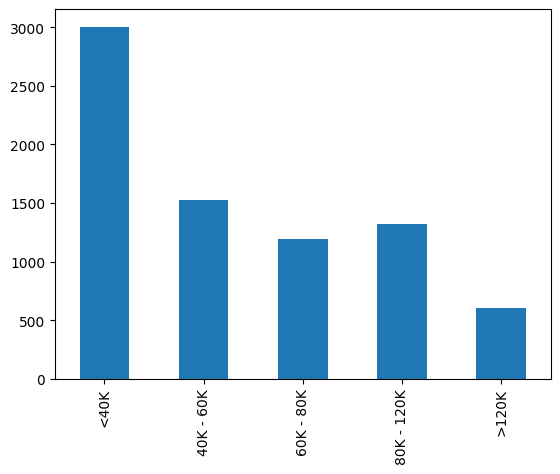

In [22]:
_ = df["Income_Category"].value_counts().loc[['<40K', '40K - 60K', '60K - 80K', '80K - 120K', '>120K']].plot.bar()

# PROCESAMIENTO DE DATOS

## Categóricos - Codificación

Al estar trabajando con datos categóricas, hay que transformarlos en algo que pueda ser procesado por un algoritmo que trabaja con datos numéricos.

En caso de tratarse de variables con dos posibles estados, eso se resuelve con One Hot Encoding, es decir, utilizando 1 para la presencia y 0 para la ausencia de esta categoría.

Sin embargo, para variables categóricas que puedan tomar varios valores, se procede a crear nuevas variables llamadas Dummys o "ficticias', de tal manera que si tenemos por ejemplo una variable categórica que puede tomar 3 posibles valores, se convertiría de la siguiente manera:

![Variables ficticias](imágenes/dummyvariables.png)

In [23]:
# One Hot Encoding para Atrittion Flag

df['Attrition_Flag'].replace(['Existing Customer', 'Attrited Customer'], [0, 1], inplace=True)

In [24]:
categoricas

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [25]:
# One Hot Encoding + Variables ficticias para las variables categóricas

encoded = pd.get_dummies(df[categoricas], drop_first=True)

data = pd.concat([df.drop(categoricas, axis=1), encoded], axis=1)
data


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_60K - 80K,Income_Category_80K - 120K,Income_Category_<40K,Income_Category_>120K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0,1,0,1,0,0,0,0,0,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,0,0,1,0,0,1,0,0,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0,1,0,0,1,0,0,0,0,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,0,0,1,0,0,1,0,0,0,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,56,1,50,4,1,4,3688.0,606,3082.0,0.570,...,0,0,1,0,0,1,0,0,0,0
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,...,0,0,1,0,0,0,0,0,0,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,...,0,1,0,0,0,1,0,0,0,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,...,0,0,1,0,0,0,0,0,0,0


## Numéricos - Escalamiento

Los datos de entrada numéricos están distribuidos a lo largo de un rango de valores, cuya extensión depende de la naturaleza de los mismos. Algunos pueden ir de 0 a 1, otros de 0 a 10000, otros tomar valores negativos, etc.

Esta diferencia de escalas presente entre las variables de entrada puede distorsionar la percepción del modelo sobre la importancia de cada una, produciendo inestabilidades y haciendo que nuestro modelo se comporte de forma errática en el proceso de aprendizaje, y entregue pobres resultados durante su implementación.

Es por eso que se procede a escalar los datos, para que todos varien entre los mismos valores pero conserven sus posiciones relativas. De esta manera, no se modifica la información pero se evitan los problemas mencionados para el modelo.

In [26]:
X=data.drop(['Attrition_Flag'], axis=1)
print(f"Entradas del modelo: {len(X.columns)}")

y=data['Attrition_Flag']
print("Salidas del modelo: 1")

Entradas del modelo: 29
Salidas del modelo: 1


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)


X_PRUEBA = X[-20:-1]
y_PRUEBA = y[-20:-1]

C:\Users\Lautaro\AppData\Local\Temp\ipykernel_6716\632082531.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_PRUEBA = y[-20:-1]


# Modelo

## Selección de variables

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[0:-20], y[0:-20], test_size=0.2, random_state=0)

C:\Users\Lautaro\AppData\Local\Temp\ipykernel_6716\3447933060.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  X_train, X_test, y_train, y_test = train_test_split(X[0:-20], y[0:-20], test_size=0.2, random_state=0)


## Definición de la red neuronal

In [29]:
import tensorflow as tf

capas = [
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(29, activation='relu'),
        tf.keras.layers.Dense(45, activation='relu'),
        tf.keras.layers.Dense(7, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
        ]

In [30]:
modelo = tf.keras.Sequential(capas)

Para compilar nuestro modelo, debemos indicar qué métricas utilizar, lo que nos lleva a la siguiente explicación.

### F1 Score

#### Fundamentación teórica

Como se planteó anteriormente, estamos trabajando con un conjunto de datos **desbalanceado**, es decir, nuestra variable a predecir posee una distribución desigual, donde una de los posibles valores es mucho menos frecuente que otro. Esto puede traer un gran inconveniente, que es que nuestro modelo 'aprenda' a clasificar a todos los vectores de entrada como pertenecientes a la categoría más frecuente, debido a que si hace esto obtendrá por lo general altos puntajes de exactitud.

Para evitar esto, debemos implementar un sistema de puntaje para nuestro modelo que contemple los falsos positivos y los falsos negativos (error de tipo I y tipo II). Estos se consigue con las métricas de *Precisión* y *Recall*

<u>PRECISION</u>

La precisión es la proporción de verdaderos positivos (TP) por la suma de verdaderos positivos (TP) y falsos positivos (FP).

<u>RECALL</u>

El Recall es la proporción de verdaderos positivos (TP) por la suma de verdaderos positivos (TP) y falsos negativos (FN).

<u>F1 Score</u>

Finalmente, si deseamos exigir que nuestro modelo tenga la capacidad de entregar tanto pocos falsos negativos como falsos positivos, debemos aplicar la métrica de F1 Score. Esta métrica se calcula como la media armónica entre la Precisión y el Recall de un modelo, por lo que valores bajos de uno de estos, castigará el resultado final sin importar que tan grande sea el otro. En otras palabras, por mas que tengamos muy pocos falsos positivos, si tenemos una gran cantidad de falsos negativos el puntaje caerá abruptamente, haciendo que las próximas iteraciones de entrenamiento de nuestro modelo intenten corregir esas clasificaciones.

#### Implementación

Por defecto, Keras nos permite compilar un modelo definiendo su función pérdida y sus métricas. Dentro de las métricas disponibles, no se encuentra el F1 Score. Sin embargo, tambien es posible agregar una función propia para calcular la métrica del modelo y pasarla por parámetro al compilador.

La definición de la función F1 Score fue tomada de [este enlace](https://aakashgoel12.medium.com/how-to-add-user-defined-function-get-f1-score-in-keras-metrics-3013f979ce0d), que dirije al blog de Aakash Goel y a quien se le da el crédito de esta parte del presente trabajo y se le agradece por su útil contribución.

In [31]:
from keras.callbacks import Callback, ModelCheckpoint
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def F1_SCORE(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

### Learning Rate

#### Fundamentación teórica

También, debemos indicar qué tasa de aprendizaje empleará nuestro optimizador para hacer los ajustes luego de cáda época, la cual le indica al optimizador cuánto variar los parámetros del modelo para realizar las correcciones. 

Valores grandes de la tasa de aprendizaje resultan en una rápida estabilización del modelo, es decir, se corrigen los parámetros bruscamente y se llega rápido a un valor cercano al óptimo. Sin embargo, debido a que los saltos de valores son muy grandes, los parametros dificilmente lleguen a ser los optimos, sino que oscilaran alrededor de los mismos, produciendo que el modelo no pueda ajustarse finamente para seguir mejorando.

Entonces, optaríamos por una tasa de aprendizaje pequeña, que le daría una mayor sensibilidad al sistema y permite que el mismo se ajuste finamente. Sin embargo, esto provoca que si los parámetros estan lejos del valor deseado (como suele suceder al inicio del proceso de aprendizaje), el optimizador esté varias epocas realizando pequeños ajustes siempre en la misma dirección, para alcanzar un valor que está muy lejos. Esto se traduce en la necesidad de muchas épocas de aprendizaje, y un enorme consumo de tiempo y recursos.

Para solucionar esto, podemos decirle inteligentemente al optimizador que comience con una tasa de aprendizaje grande para lograr una rápida estabilización del modelo, y que con el pasar de las épocas, a medida que el modelo está más cerca de los valores óptimos, la disminuya para poder realizar los ajustes finos.


#### Implementación

Para implementar este comportamiento de la tasa de aprendizaje, Keras nos proporciona las Schedules, funciones que devuelven una tasa de aprendizaje distinta, dependiendo del valor que toma la curva de aprendizaje. Podemos utilizar aquellas que vienen por defecto, o definir nosotros el comportamiento. Para este caso, optamos por una incluida en Keras llamada ExponentialDecay que nos dió buenos resultados.


In [32]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.7)

In [33]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy", F1_SCORE])

In [34]:
historial = modelo.fit(X_train, y_train, epochs=150, validation_data=(X_test,y_test), verbose = 0)

# RESULTADOS

## MÉTRICAS

A continuación, se visualizarán las métricas del modelo (Exactitud, F1 Score) y la función pérdida empleada por el optimizador, junto a su evolución a medida que avanzan las épocas de entrenamiento.

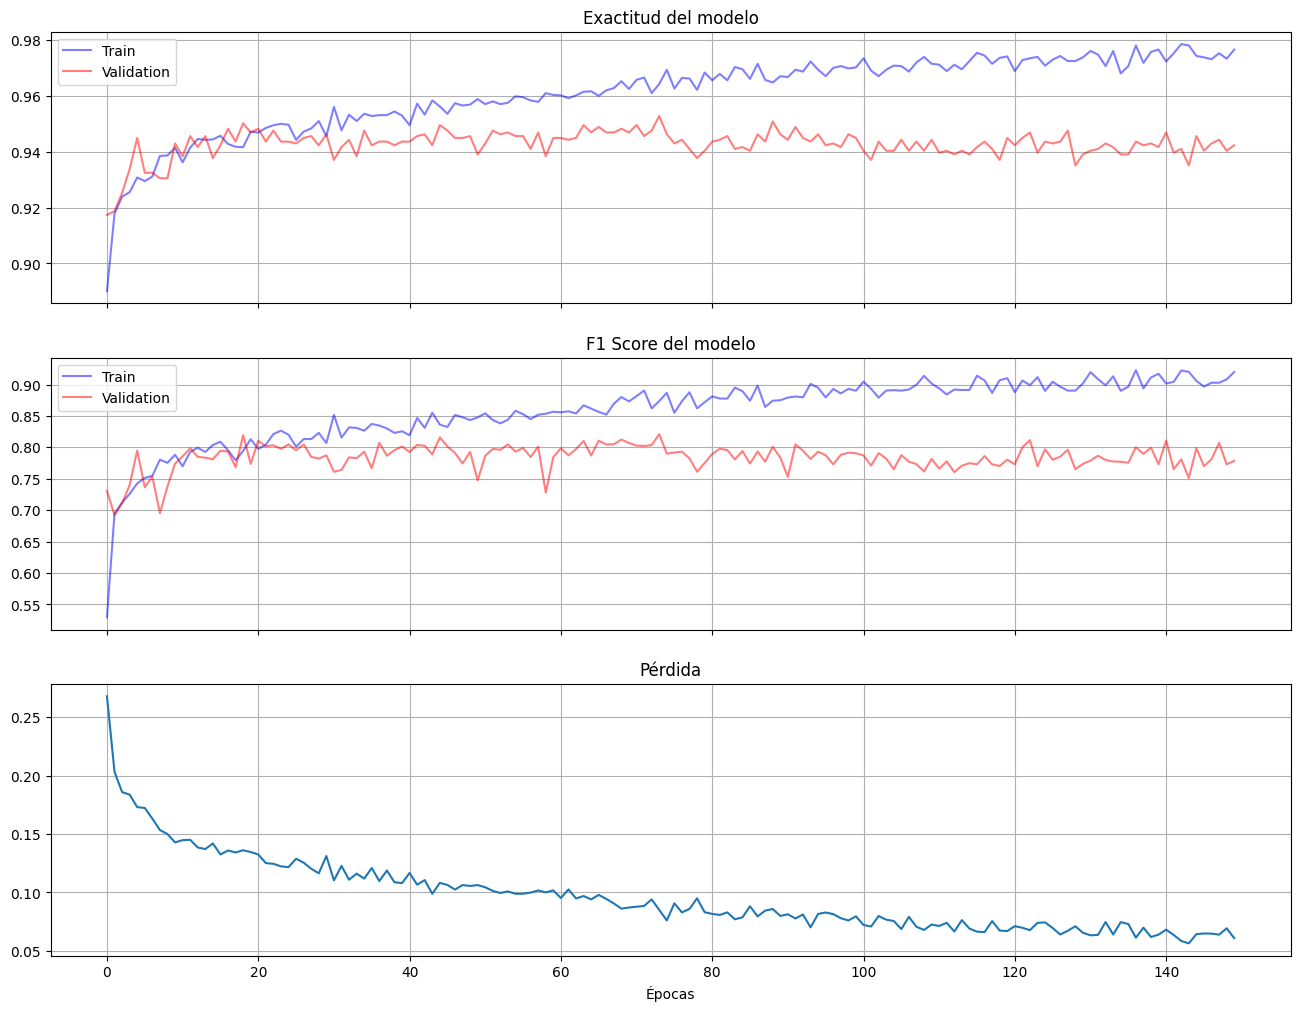

In [48]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize = (16,12))

axs[0].set_title("Exactitud del modelo")

_ = axs[0].plot(historial.history["accuracy"], color = 'blue', label = "Train", alpha = 0.5)
_ = axs[0].plot(historial.history["val_accuracy"], color = 'red', label = "Validation", alpha = 0.5)
_ = axs[0].legend()
_ = axs[0].grid()


axs[1].set_title("F1 Score del modelo")

_ = axs[1].plot(historial.history["F1_SCORE"], color = 'blue', label = "Train", alpha = 0.5)
_ = axs[1].plot(historial.history["val_F1_SCORE"], color = 'red', label = "Validation", alpha = 0.5)
_ = axs[1].legend()
_ = axs[1].grid()


axs[2].set_title("Pérdida")
_ = axs[2].plot(historial.history["loss"])
_ = axs[2].set_xlabel("Épocas")
_ = axs[2].grid()

Estos son los valores finales del modelo:

In [60]:
print( f" Exactitud del modelo (Validación): {round(historial.history['val_accuracy'][-1],2)} ")
print( f" F1 Score del modelo  (Validación): {round(historial.history['val_F1_SCORE'][-1],2)} ")

 Exactitud del modelo (Validación): 0.94 
 F1 Score del modelo  (Validación): 0.78 


## PRUEBAS
Finalmente, utilizaremos los valores que hemos dejado a un lado durante todo el proceso de aprendizaje (X_PRUEBA e y_PRUEBA), y por lo tanto nunca han sido vistos por el modelo en ninguna de sus etapas, para una pequeña demostración de su funcionamiento

Para ello, definiremos manualmente un umbral (Threshold) que se comparará con la salida de nuestro modelo. Si la salida supera dicho umbral, se considera que el cliente abandonará el banco, caso contrario permanecerá como cliente. 

In [65]:
THRESHOLD = 0.6
original = y_PRUEBA.values
sigmoid = modelo.predict(X_PRUEBA)[:,0]
resultados = pd.DataFrame([original, sigmoid]).T
resultados.columns = ["Original", "Sigmoid"]
resultados.head()

1/1 [==============================] - 0s 18ms/step


,Original,Sigmoid
0,0.0,2.270623e-09
1,1.0,6.744457e-01
2,0.0,6.923046e-16
3,1.0,1.215306e-04
4,1.0,9.999973e-01


In [66]:
resultados["Sigmoid"] = resultados["Sigmoid"].apply(lambda t: round(t,2))
resultados["Predicción"] = resultados["Sigmoid"].apply(lambda t: 1 if t >= THRESHOLD else 0)
resultados

,Original,Sigmoid,Predicción
0,0.0,0.00,0
1,1.0,0.67,1
2,0.0,0.00,0
3,1.0,0.00,0
4,1.0,1.00,1
5,0.0,0.00,0
6,0.0,0.00,0
7,0.0,0.00,0
8,1.0,1.00,1
9,1.0,0.99,1


Como se puede ver, acierta en la mayoría de los casos con el entrenamiento y el umbral especificados.

# CONCLUSIÓN

Hemos logrado predecir con éxito qué usuarios dejarán la entidad bancaria mediante un proceso de aprendizaje automático.

A lo largo del trabajo, hemos realizado distintos procesos de un trabajo de Machine Learning, tales como obtención de datos, visualización, análisis exploratorio, tratamiento de valores faltantes, entrenamiento, validación y testeo, junto con definición, análisis y visualización de métricas.

Como futuras líneas, este trabajo puede verse beneficiado por la reducción de dimensionalidad, eliminando variables que no aporten mucha información al análisis. También, con un mayor conocimiento técnico especifico del tema a tratar, podemos trabajar sobre los datos de entrada para generar nuevas variables de mayor valor y aporte al modelo. Finalmente, se puede profundizar sobre la selección del umbral de decisión, buscando el valor óptimo del mismo y graficando el desempeño del mismo a medida que toma distintos valores.